# STUDENT PERFORMANCE INDICATOR

## Life cycle of Machine learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

## 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 columns and 1000 rows.

## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

### Import the CSV Data as Pandas DataFrame

In [ ]:
print(os.getcwd())

In [4]:
df = pd.read_csv('data/stud.csv')

### Show First 5 Records

In [41]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2 Dataset information

### Shape of Dataset

In [42]:
df.shape

(1000, 8)

So, the student dataset has 1000 data points and 8 attributes.

## 3. Data Checks to perform


- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1 UNIQUE VALUES IN EACH CATEGORICAL COLUMN

In [43]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Above mentioned are the number of unique values in each column

In [44]:
for col in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    print(f" Categories in {col} = {df[col].unique()}")

 Categories in gender = ['female' 'male']
 Categories in race_ethnicity = ['group B' 'group C' 'group A' 'group D' 'group E']
 Categories in parental_level_of_education = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 Categories in lunch = ['standard' 'free/reduced']
 Categories in test_preparation_course = ['none' 'completed']


- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3.2 Check for missing values

In [45]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no null values in this dataset.

## Checking for Duplicates

In [5]:
df.duplicated().sum()

0

So, no duplicates are present in the dataset.

## 3.3  Datatypes of values present in each column

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- So, here we have 5 categorical attributes and 3 numerical ones.

## 3.4 Statistics of the Dataset

In [47]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Score range- All subjects range from a minimum to a maximum of 0–100 (except reading and writing which start from 17 and 10 respectively).
- Mean- The Mean and Median are close which means the distributions are roughly symmetric and not skewed heavily.
- Std. Deviations are similar, therefore indicate similar variability in all three subjects.

In [63]:
df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total'] /3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
full_mathscore = (df['math_score'] == 100).sum()
full_readingscore = (df['reading_score'] == 100).sum()
full_writingscore = (df['writing_score'] == 100).sum()

print(f" Total no. of students with full marks in math = {full_mathscore}")
print(f" Total no. of students with full marks in reading = {full_readingscore}")
print(f" Total no. of students with full marks in writing = {full_writingscore}")

 Total no. of students with full marks in math = 7
 Total no. of students with full marks in reading = 17
 Total no. of students with full marks in writing = 14


In [51]:
mathscore_less = (df['math_score'] <= 20).sum()
readingscore_less = (df['reading_score'] <= 20).sum()
writingscore_less = (df['writing_score'] <= 20).sum()

print(f" Total no. of students with 20 or less marks  in math = {mathscore_less}")
print(f" Total no. of students with 20 or less marks  in reading = {readingscore_less}")
print(f" Total no. of students with 20 or less marks  in writing = {writingscore_less}")

 Total no. of students with 20 or less marks  in math = 4
 Total no. of students with 20 or less marks  in reading = 1
 Total no. of students with 20 or less marks  in writing = 3


## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

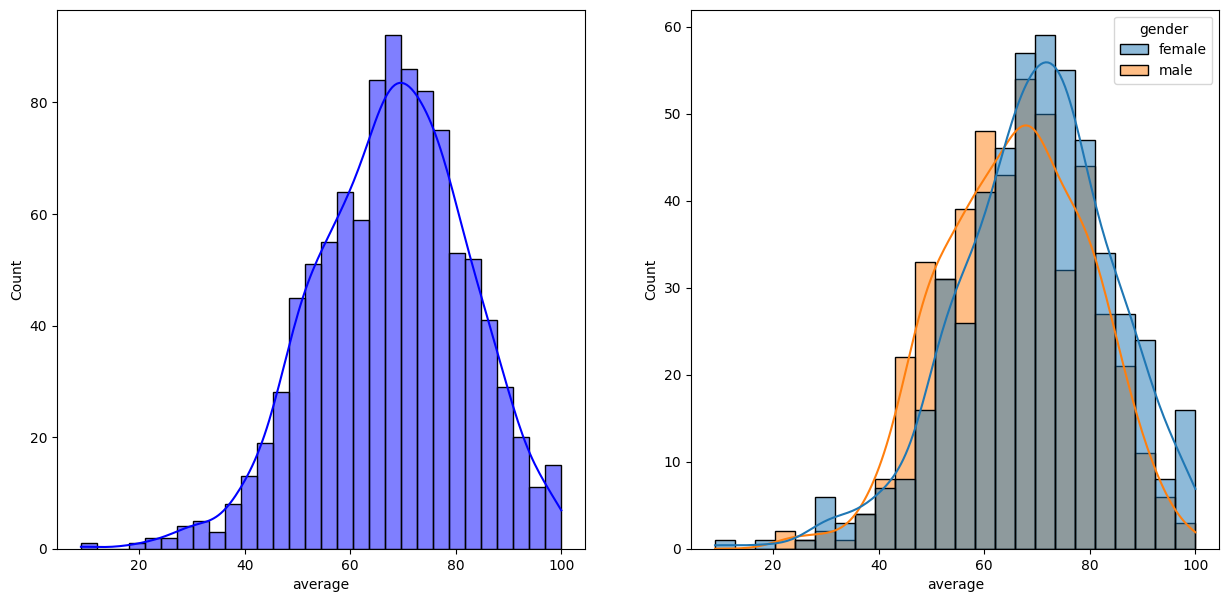

In [52]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x = 'average',bins= 30, kde = True, color = 'b')
plt.subplot(1,2,2)
sns.histplot(data=df, x= 'average', kde = True, hue ='gender')
plt.show()

- The avg for girls is greater than that of boys

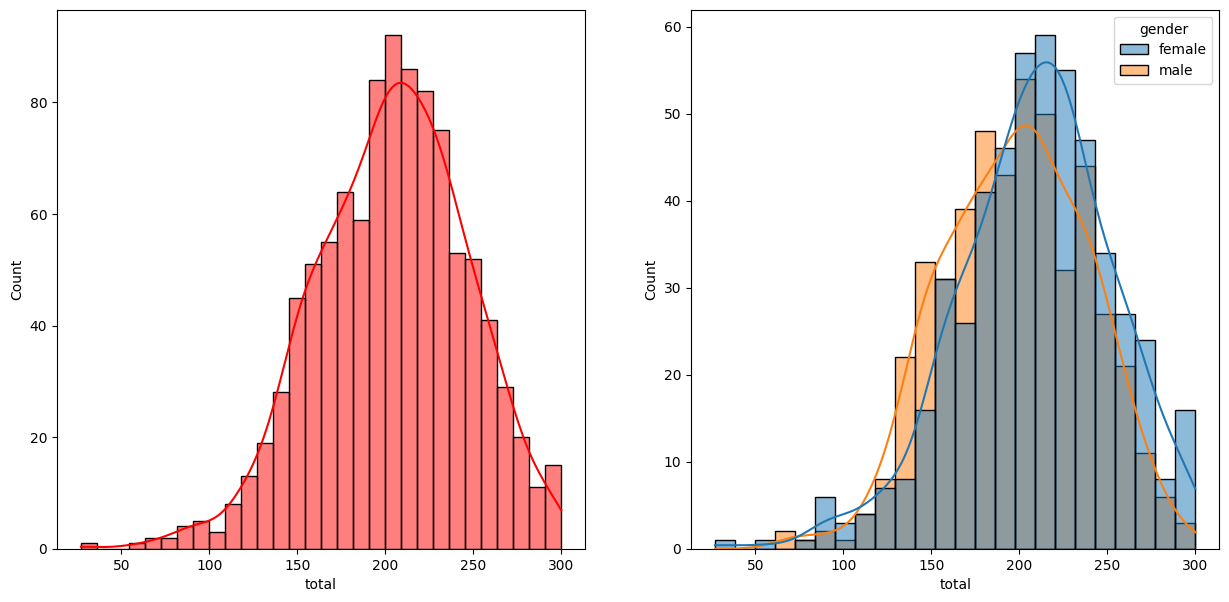

In [53]:
fig, axs = plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total', bins= 30,kde=True, color = 'r')
plt.subplot(1,2,2)
sns.histplot(data=df, x = 'total', kde=True, color='v', hue='gender')
plt.show()

- Not just the avg, but the total marks is also greater of girls than that of boys.

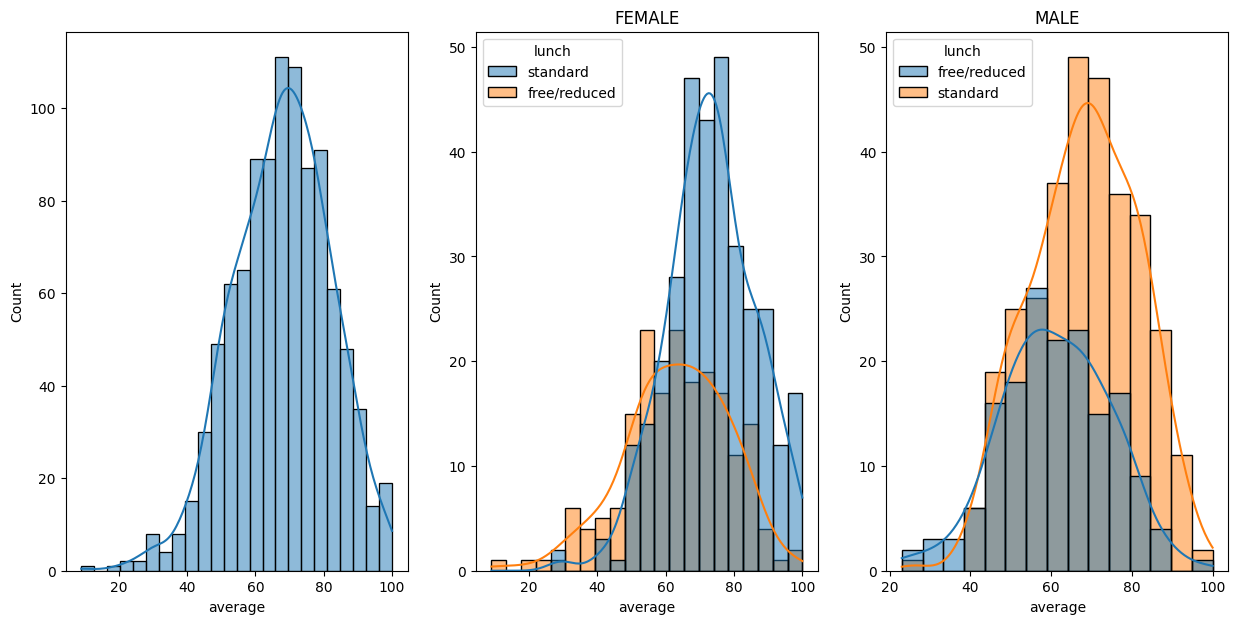

In [54]:
fig, axs= plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True,)
plt.subplot(1,3,2)
plt.title('FEMALE')
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch',color='r')
plt.subplot(1,3,3)
plt.title('MALE')
sns.histplot(data=df[df['gender']=='male'], x = 'average', kde=True, hue='lunch',color='r')
plt.show()

- So regardless of gender- Standard Lunches have greater averages.

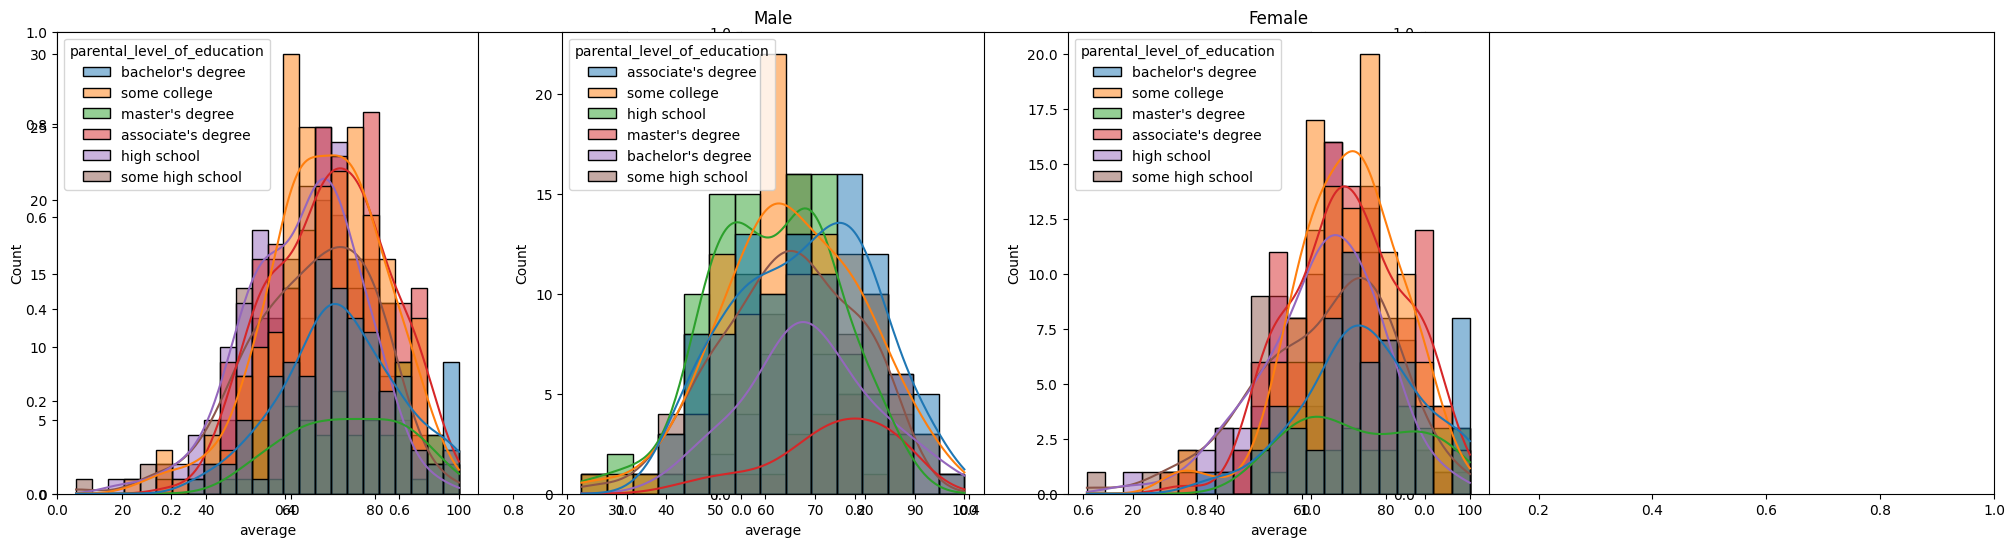

In [55]:
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
plt.title('Male')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
plt.title('Female')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

- For females, all the graph lines are almost centered similarly, so parental level of education doesn’t significantly affect the scores for females.
- For males, the red and blue KDE curves are shifted more to the right. This means male students whose parents have higher education (Associate’s or Master’s) tend to score higher on average.

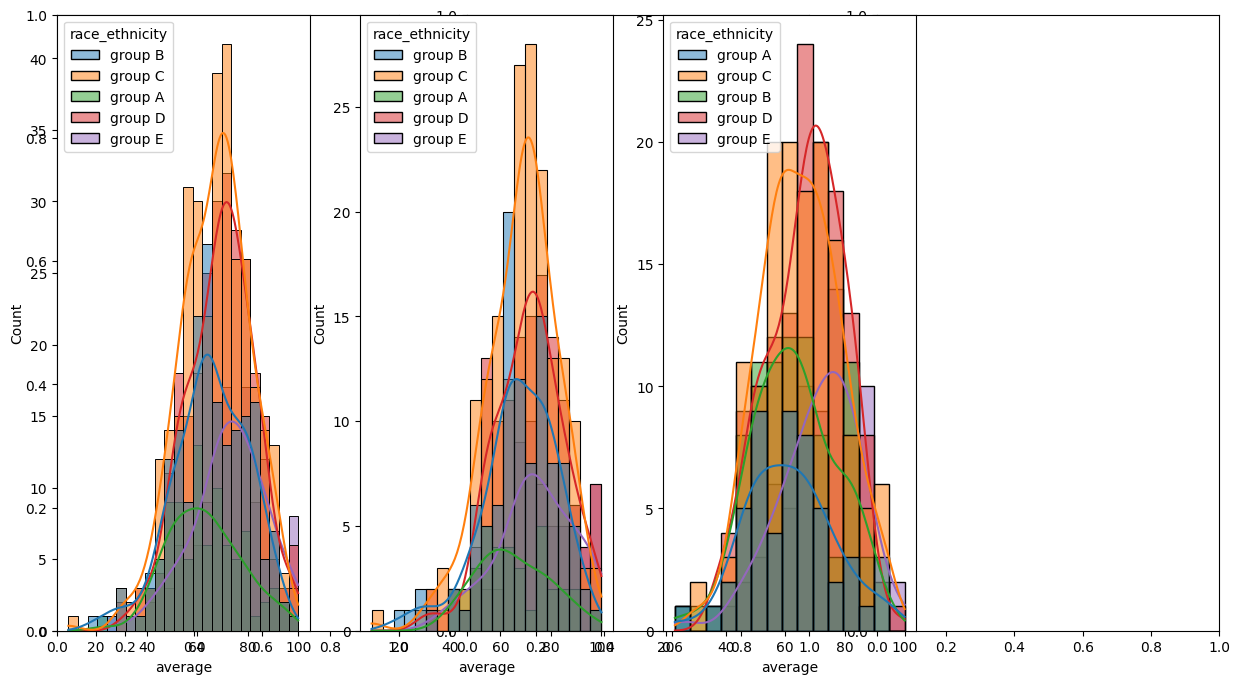

In [56]:
fig, axs=plt.subplots(1,3,figsize=(15,8))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- For females, groups C, D, and E perform very well (meaning students belonging to these groups have higher averages), with group E performing the best.
- For males, groups D and E perform well, with group E performing the best.
- Overall, group E performs the best, followed by groups D and C.
- Students in groups A and B tend to perform poorly in exams, regardless of whether they are male or female.


## 4.2 Maximum Scores in Subjects

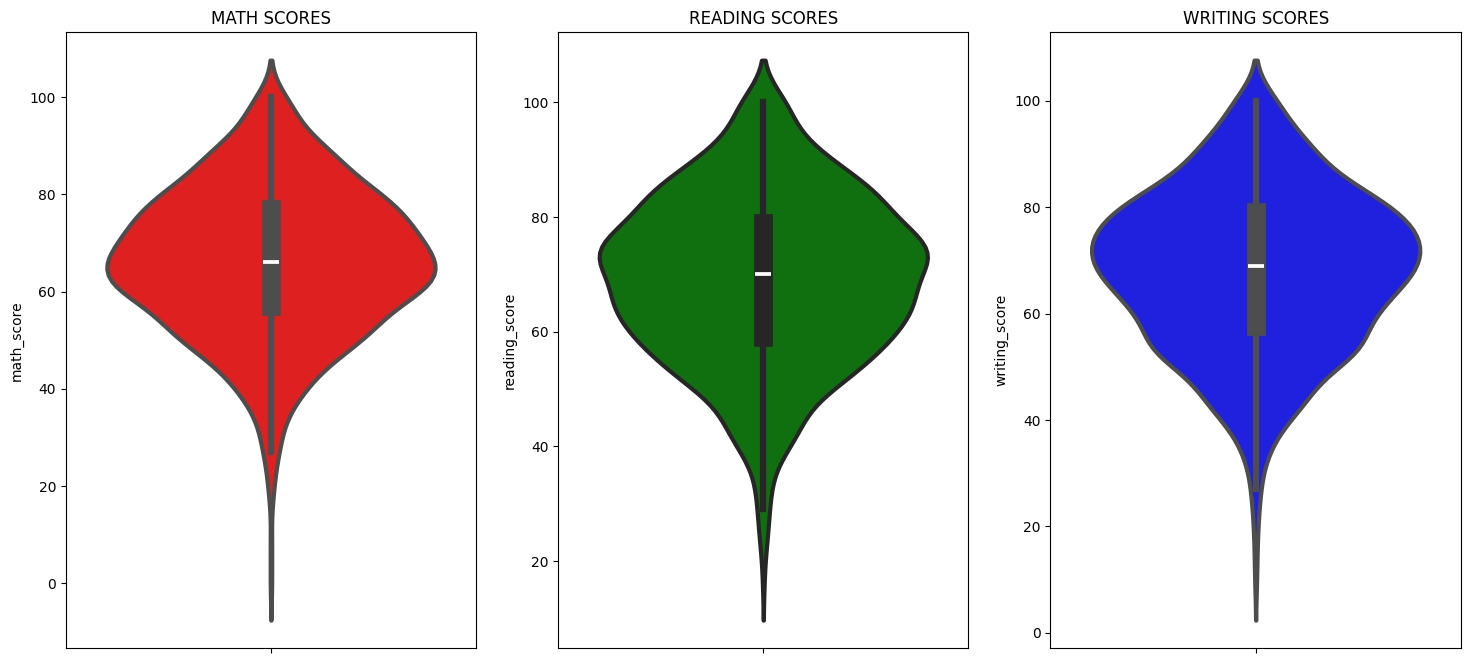

In [57]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- Most students scored around 65 in Maths, around 75 in Reading and around 70 in Writing.

## 4.3 Multivariate analysis using pieplot

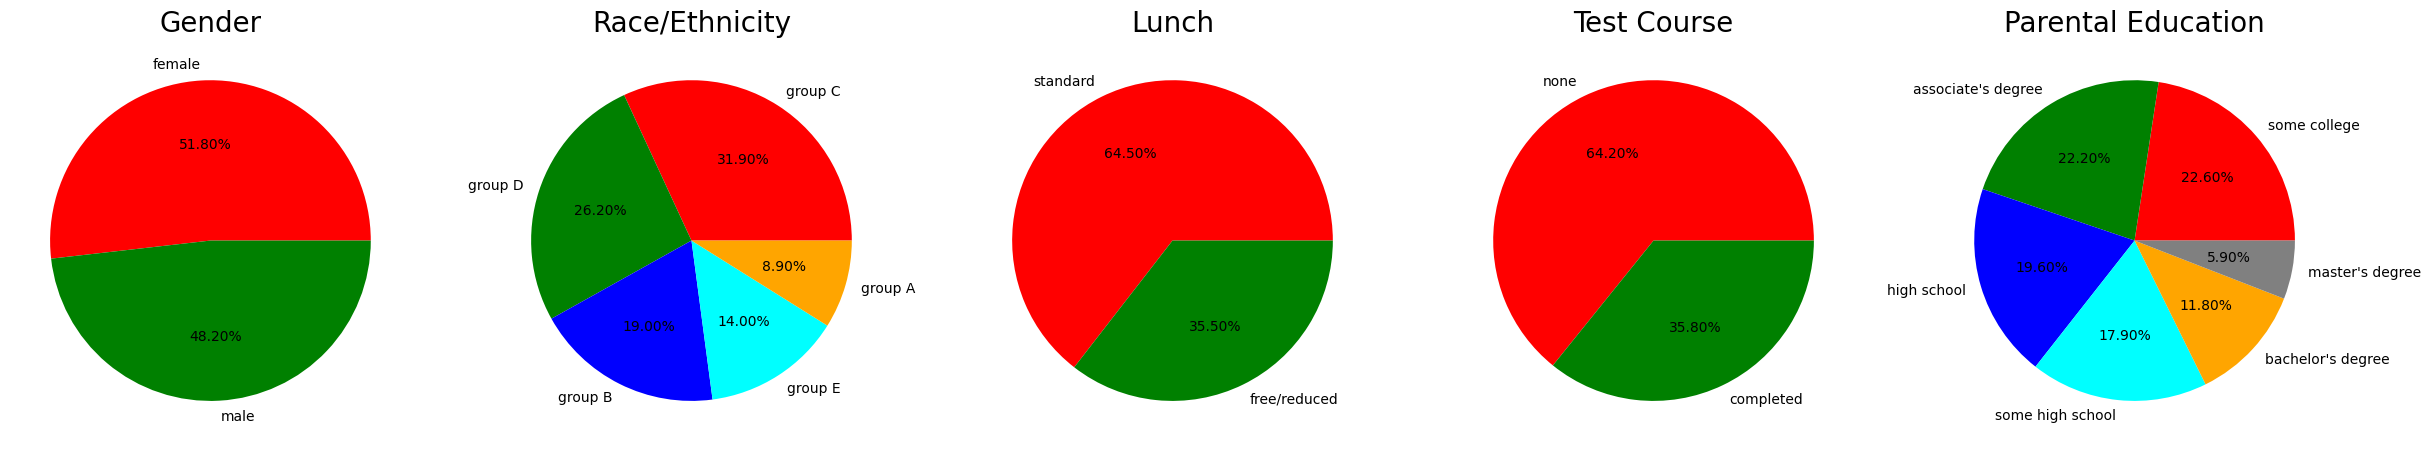

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index    # so that we can get the labels in the correct order
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels= size.index
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


#plt.tight_layout()

plt.show()

- No. of females is almost equal to no. of males.
- Most no. of students belong to group C.
- More than half of the students have Standard Lunch.
- More than half of the students have not completed the test course.
- The no. of students whose parental education is 'Some college' is greatest, followed closely by 'Associate's degree'.

## 4.4 Feature Wise Visualization


## 4.4.1 GENDER COLUMN
- How is the distribution of Gender ?
- Does gender have any impact on the student's performance ?

## UNIVARIATE ANALYSIS  (How is the distribution of Gender ?)

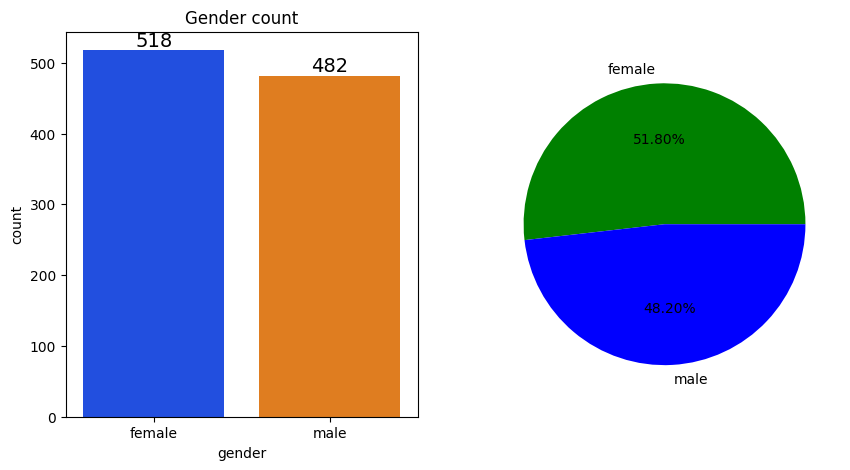

In [59]:
fig, axs= plt.subplots(1,2, figsize =(10,5))

sns.countplot(data=df, x='gender', palette='bright', ax=axs[0])
axs[0].set_title('Gender count')
for bar in axs[0].containers:
    axs[0].bar_label(bar, color='black', size=14)

gender_counts = df['gender'].value_counts()
labels = gender_counts.index
color=['green', 'blue']
axs[1].pie(gender_counts, colors=color, labels=labels, autopct='%.2f%%')
plt.show()

- Overall, Gender has a balanced distribution among males and females.

## BIVARIATE ANALYSIS (Does gender have any impact on the student's performance ?)

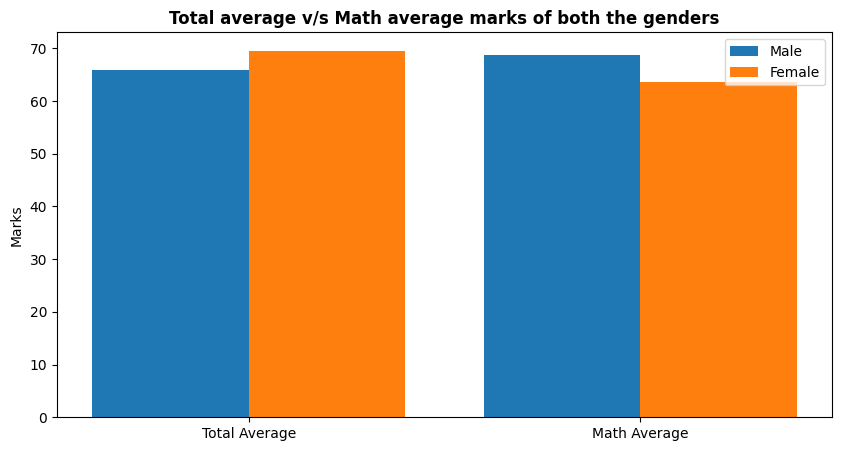

In [60]:
gender_group = df.groupby('gender')[['math_score', 'average']].mean()
plt.figure(figsize=(10, 5))

X = ['Total Average','Math Average']
X_axis = np.arange(len(X))

female_scores = [
    gender_group.loc['female', 'average'],
    gender_group.loc['female', 'math_score']
]

male_scores = [
    gender_group.loc['male', 'average'],
    gender_group.loc['male', 'math_score']
]

  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- So, female students tend to perform well overall compared to males but male students perform better than females in math.

## 4.4.2 RACE/ETHNICITY COLUMN
- How is the Group wise distribution ?
- Does Race/Ehnicity have any impact on student's performance ?

## UNIVARIATE ANALYSIS ( How is the Group wise distribution ?)

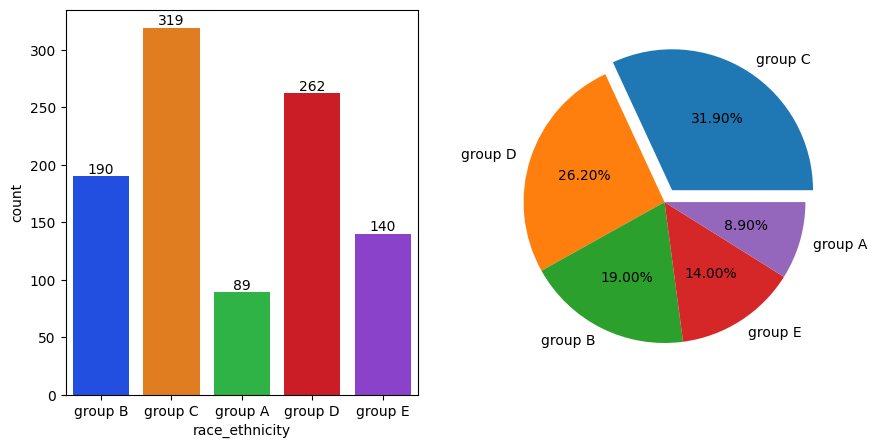

In [61]:
fig, axs = plt.subplots(1,2,figsize = (10,5))

sns.countplot(data=df, x='race_ethnicity', palette= 'bright', ax=axs[0])
for bar in axs[0].containers:
    axs[0].bar_label(bar, color='black', size=10)

race_count = df['race_ethnicity'].value_counts()

axs[1].pie(x=race_count, labels=race_count.index,autopct='%.2f%%', explode = (0.1,0,0,0,0) )
plt.show()

- Most of the students belong to group C followed by group D
- Least no. of students belong to group A

## BIVARIATE ANALYSIS (Does Race/Ethnicity have any impact on student's performance ? )

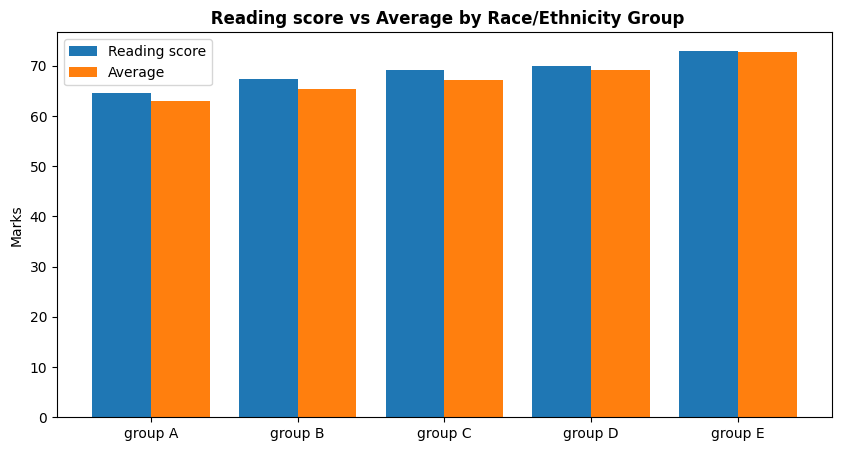

In [73]:
plt.figure(figsize= (10,5))
race_group = df.groupby('race_ethnicity')[['reading_score', 'average']].mean()

X = ['group A', 'group B', 'group C', 'group D', 'group E']
X_axis= np.arange(len(X))

reading_marks=[race_group.loc[group, 'reading_score'] for group in X ]
avg_marks= [race_group.loc[group, 'average'] for group in X ]

plt.bar(X_axis-0.2, reading_marks, 0.4, label='Reading score')
plt.bar(X_axis+0.2, avg_marks, 0.4, label='Average')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title(" Reading score vs Average by Race/Ethnicity Group", fontweight='bold')
plt.legend()
plt.show()


- group E has the best reading and average scores.
- while group A seems to be the lowest performing group across both - reading and average scores, suggesting need of potential improvement.

## 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is the educational background of a student's parent ?
- Does parental education have any impact on student's performance ?

## UNIVARIATE ANALYSIS ( What is the educational background of a student's parent ? )

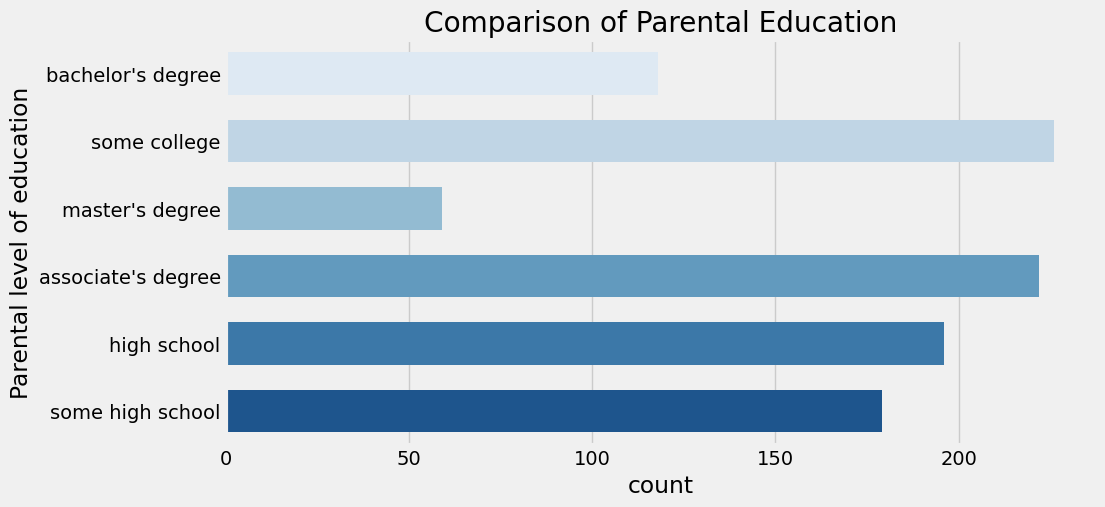

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='parental_level_of_education', palette='Blues', width = 0.7, gap= 0.1)
plt.ylabel('Parental level of education')
plt.title('Comparison of Parental Education')
plt.show()

- Most of the parents have done some college degree

## BIVARIATE ANALYSIS ( Does parental education have any impact on student's performance?)


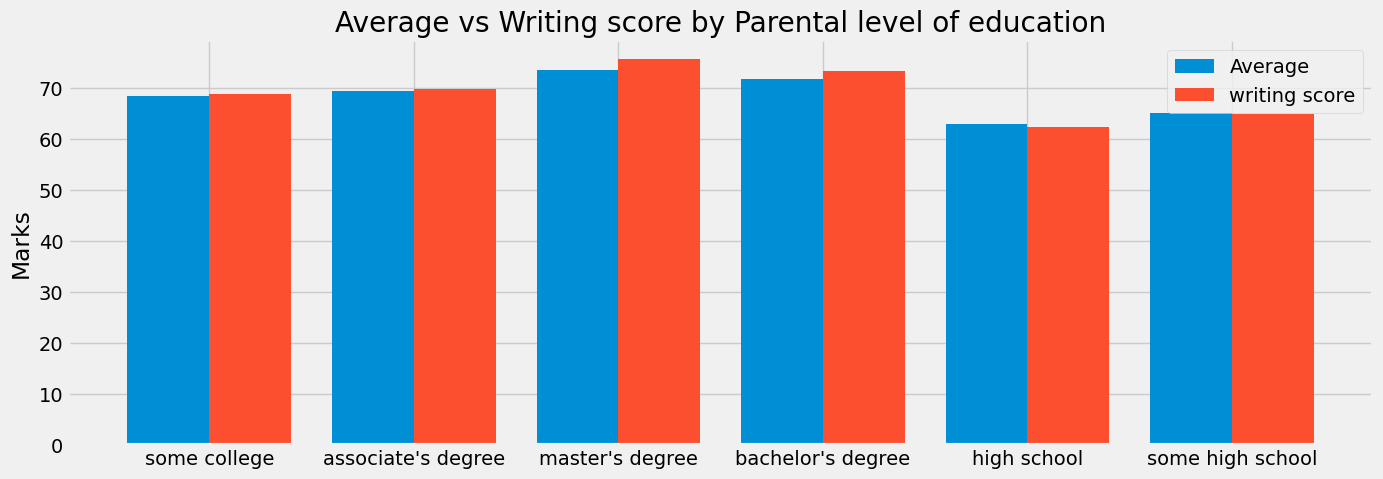

In [110]:
plt.figure(figsize=(15,5))
parent_group = df.groupby('parental_level_of_education')[['average', 'writing_score']].mean()

X = ['some college', 'associate\'s degree', 'master\'s degree', 'bachelor\'s degree', 'high school', 'some high school']
X_axis = np.arange(len(X))

parent_avg =[parent_group.loc[group, 'average'] for group in X ]
parent_writing =[parent_group.loc[group, 'writing_score'] for group in X ]

plt.bar(X_axis-0.2, parent_avg, 0.4, label='Average')
plt.bar(X_axis+0.2, parent_writing, 0.4, label='writing score')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.legend()
plt.title('Average vs Writing score by Parental level of education')
plt.show()


- Students whose parents have master’s or bachelor’s degrees tend to score higher on both average and writing scores.
- Therefore, there is a positive correlation between parental education level and student academic performance.
- Across all education levels, writing scores are either equal to or slightly higher than the average scores.
- This suggests that writing may be a relatively stronger subject for students compared to math and reading.



## 4.4.4 LUNCH COLUMN
- What type of lunch is most common among students ?
- What is the effect of lunch type on test results?

## UNIVARIATE ANALYSIS ( What type of lunch is most common among students ? )

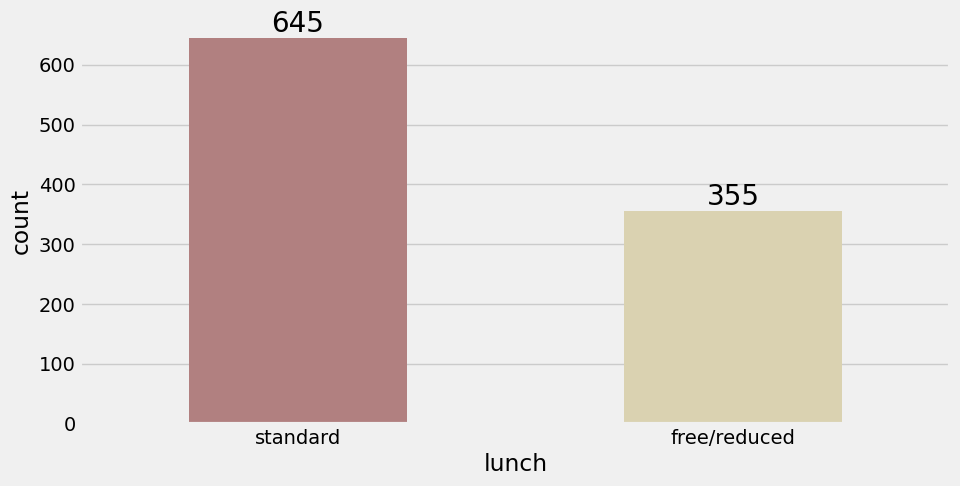

In [134]:
fig, ax =plt.subplots(1,1 ,figsize = (10,5))
sns.countplot(data=df, x = 'lunch', palette = 'pink',width= 0.5, ax=ax)
for bar in ax.containers:
    plt.bar_label(bar,fontsize=20)
plt.show()

- The amount of students having Standard lunch is almost the double of those having Free/Reduced lunch.

## BIVARIATE ANALYSIS ( Does lunch type have any impact on student's performance ? )


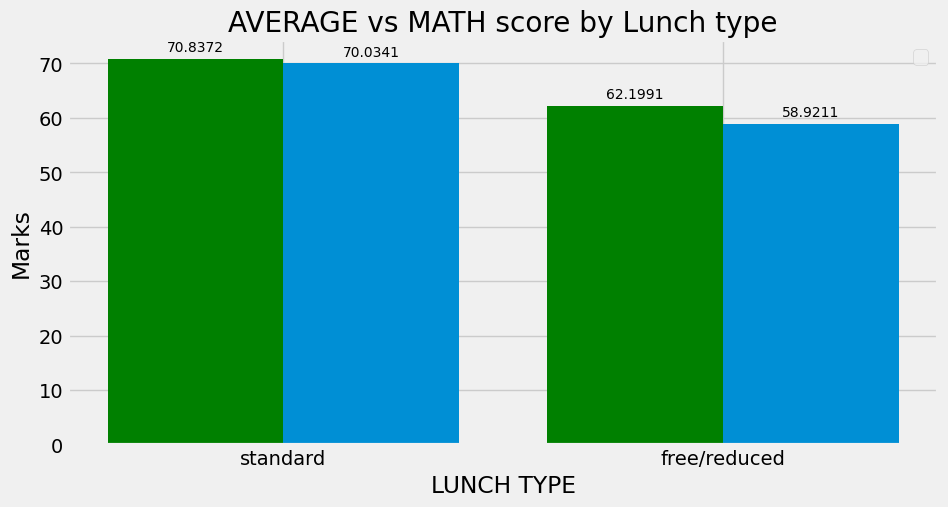

In [130]:
plt.figure(figsize=(10,5))
lunch_group = df.groupby('lunch')[['math_score', 'average']].mean()

X = ['standard', 'free/reduced']
X_axis = np.arange(len(X))

lunch_avg = [lunch_group.loc[group, 'average'] for group in X]
lunch_math = [lunch_group.loc[group, 'math_score'] for group in X]

avg_bars = plt.bar(X_axis-0.2, lunch_avg, width=0.4, color ='green')
math_bars= plt.bar(X_axis+0.2, lunch_math, width = 0.4)

plt.bar_label(avg_bars, padding=3, fontsize=10)
plt.bar_label(math_bars, padding=3, fontsize=10)


plt.xticks(X_axis, X)
plt.title('AVERAGE vs MATH score by Lunch type')
plt.xlabel('LUNCH TYPE')
plt.ylabel('Marks')
plt.legend()
plt.show()

- Students who get Standard Lunch tend to perform better than students who have free/reduced lunch.



## 4.4.5 TEST PREPARATION COURSE COLUMN
- Does Test preparation course have any impact on student's performance ?

## BIVARIATE ANALYSIS (Does Test preparation course have any impact on student's performance?)


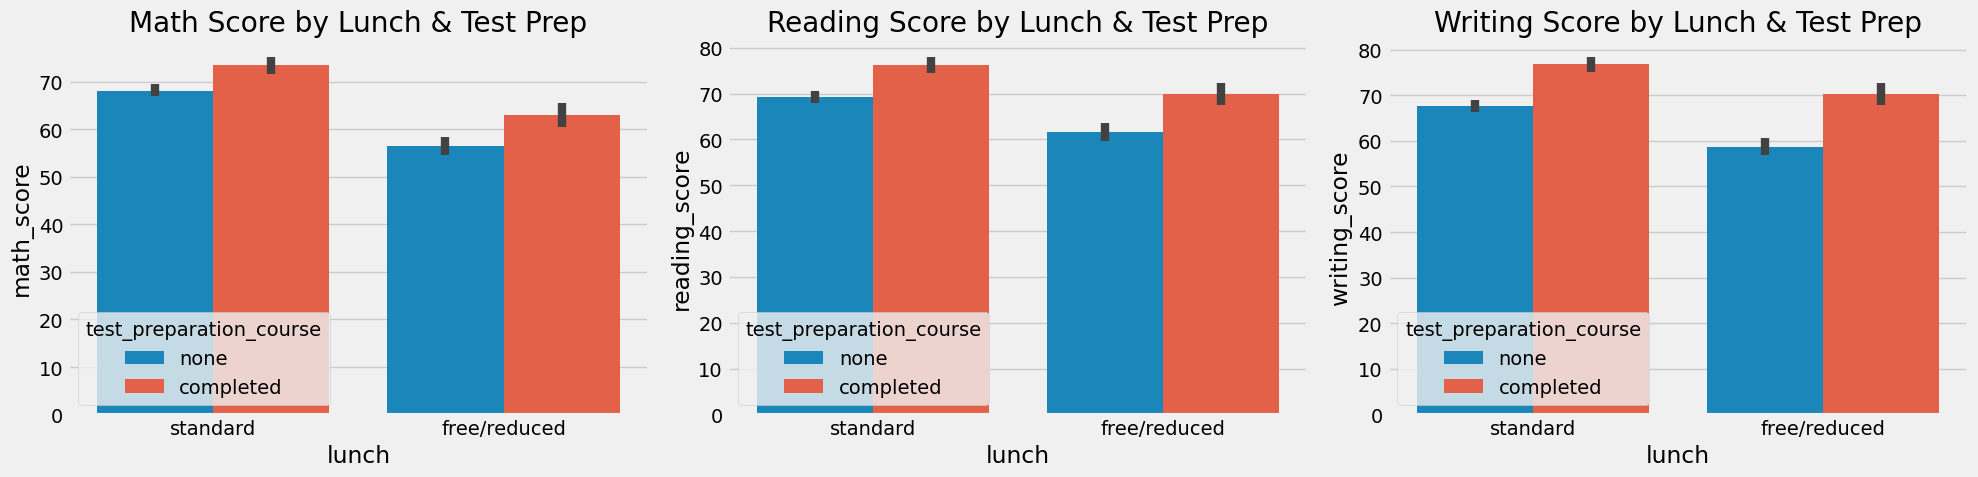

In [146]:
plt.figure(figsize=(20, 5))

# Math score
plt.subplot(1, 3, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title('Math Score by Lunch & Test Prep')

# Reading score
plt.subplot(1, 3, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title('Reading Score by Lunch & Test Prep')

# Writing score
plt.subplot(1, 3, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title('Writing Score by Lunch & Test Prep')

plt.tight_layout()
plt.show()

- In all three subjects (math, reading, and writing), students who completed the test preparation course consistently scored higher than those who did not.
- Students who had standard lunch generally scored higher than those with free/reduced lunch, regardless of test prep.
- Even students from a disadvantaged background (free/reduced lunch) benefited from the test prep course, which helped reduce the performance gap to some extent.

## 4.4.6 CHECKING OUTLIERS

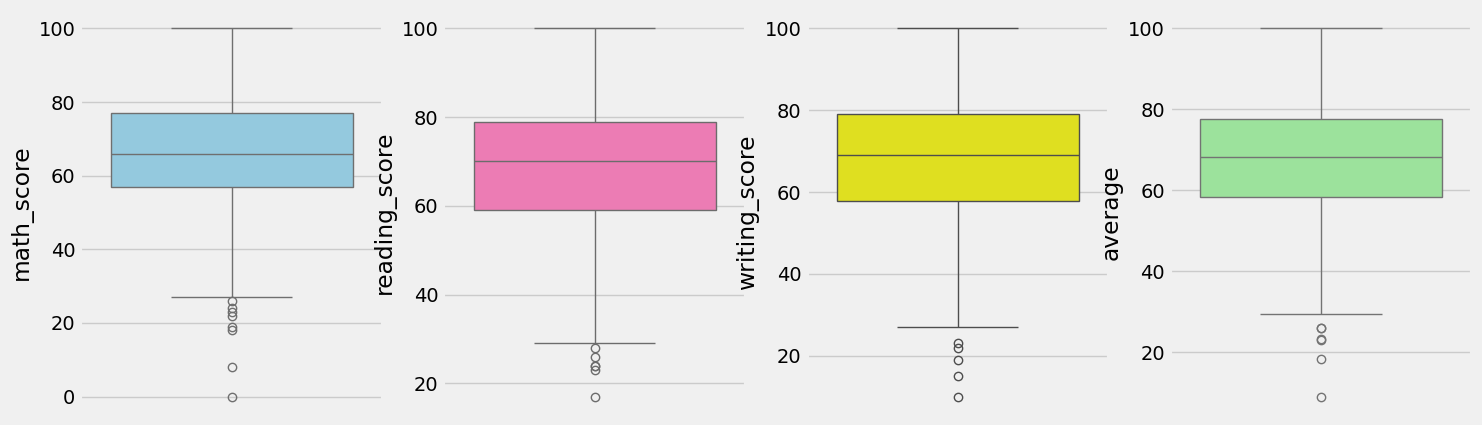

In [142]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

- Outliers are present.

## 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

<Figure size 2000x500 with 0 Axes>

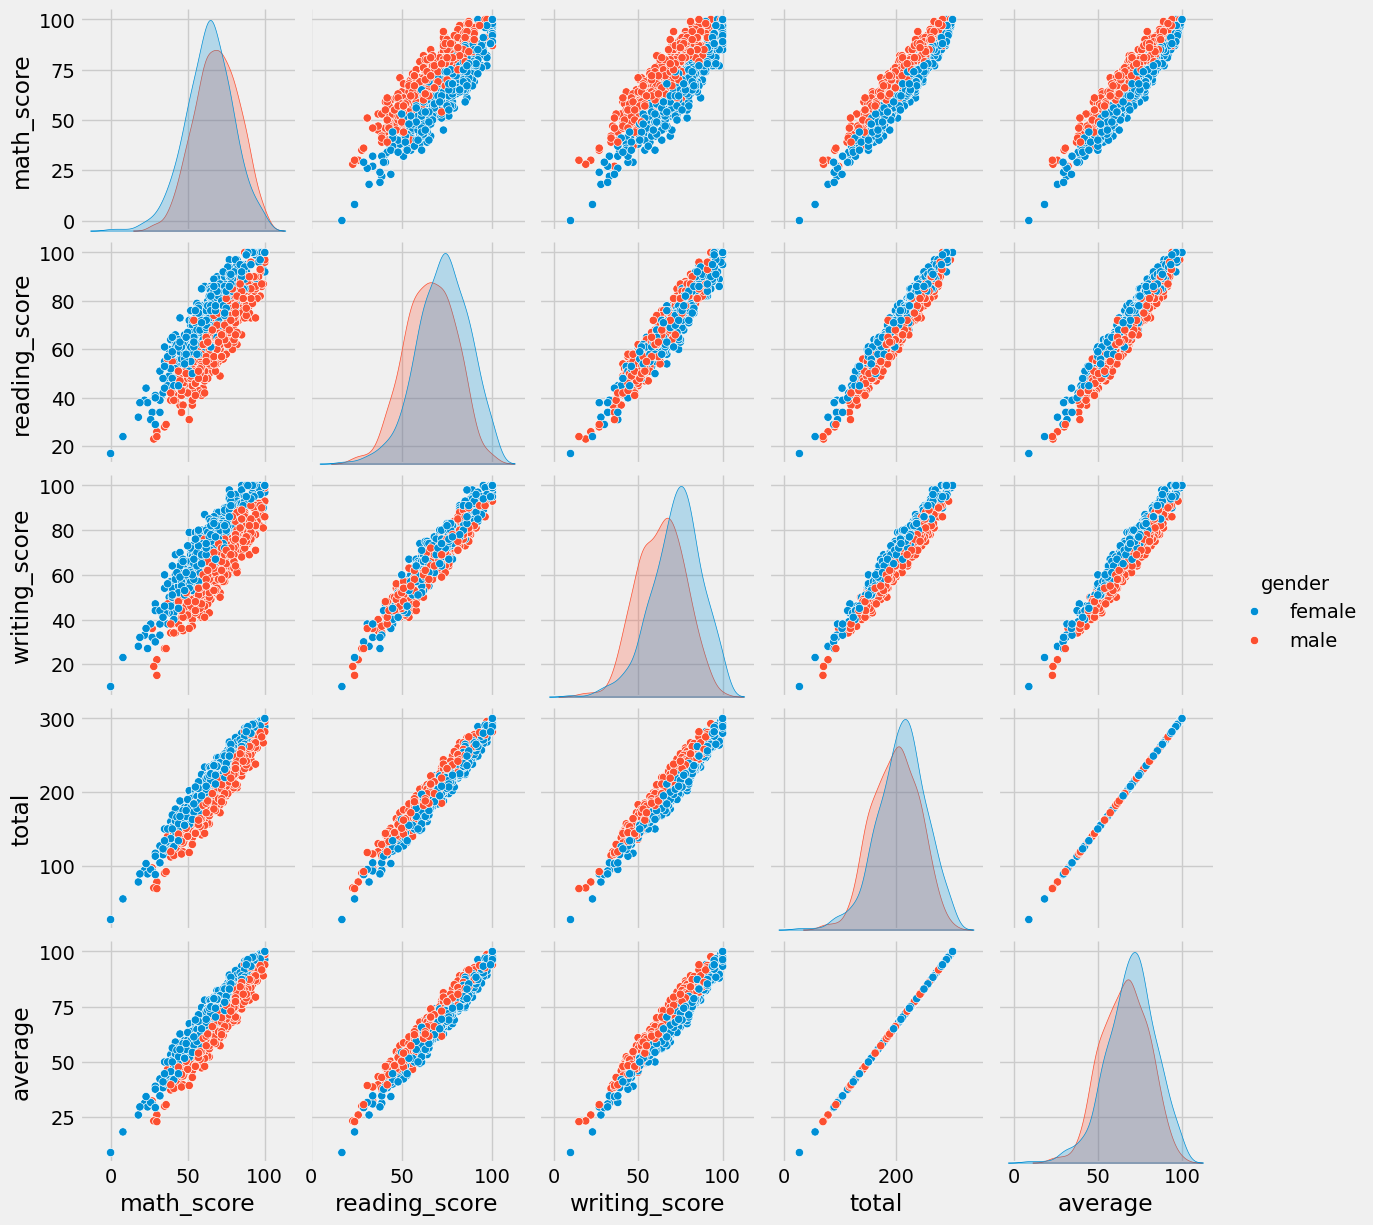

In [144]:
plt.figure(figsize = (20,5))
sns.pairplot(df,hue = 'gender')
plt.show()

- From the above pairplot, we can confirm that scores are linearly increasing with eachother.